In [1]:
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

from model import EyeClassifierCNN

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [4]:
dataset = datasets.ImageFolder(root="processed_dataset/", transform=transform)

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
dataset.class_to_idx

{'eye': 0, 'not_eye': 1}

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
def get_num_correcct(preds, labels):
    sum = 0 
    for i in range(len(preds)):
        if preds[i].item() == labels[i].item():
            sum += 1
    return sum
        

In [8]:
def model_train(model, optimizer, criterion, dataloader):
    model.train()
    actual = []
    predicted = []
    for batch in dataloader:
        images, labels = batch
        labels = labels.to(device)
        images = images.to(device)
        labels = labels.unsqueeze(1).float()
        
        preds = model(images)
        loss = criterion(preds, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        for label in labels: actual.append(int(label.item()))
        for pred in preds: predicted.append(int(pred.item())) 
            
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    return actual, predicted


In [9]:
def model_eval(model, criterion, dataloader):
    model.eval()
    actual = []
    predicted = []
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            labels = labels.to(device)
            images = images.to(device)
            labels = labels.unsqueeze(1).float()
            
            preds = model(images)
            
            for label in labels: actual.append(int(label.item()))
            for pred in preds: predicted.append(int(pred.item())) 
            
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    return actual, predicted

In [10]:
model = EyeClassifierCNN().to(device)


criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0008)

In [11]:
def create_confusion_matrix(actual,predicted, epoch):
    
    cm = confusion_matrix(actual,predicted)
    
    sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Eye','Not Eye'],
            yticklabels=['Eye','Not Eye'])
    plt.ylabel('Actual', fontsize=13)
    plt.title(f'Eval Confusion Matrix - Epoch #{epoch+1}', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

Epoch #1 
Training: 
               precision    recall  f1-score   support

           0       0.63      0.88      0.73      1449
           1       0.89      0.66      0.76      2215

    accuracy                           0.75      3664
   macro avg       0.76      0.77      0.75      3664
weighted avg       0.79      0.75      0.75      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.60      0.95      0.74       187
           1       0.94      0.57      0.71       271

    accuracy                           0.72       458
   macro avg       0.77      0.76      0.72       458
weighted avg       0.80      0.72      0.72       458



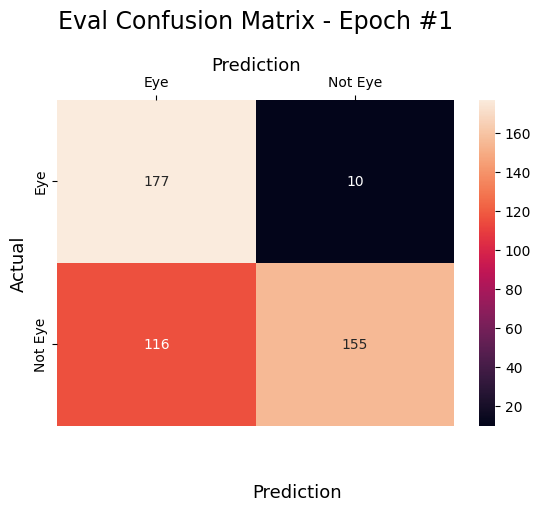

Epoch #2 
Training: 
               precision    recall  f1-score   support

           0       0.67      0.90      0.77      1449
           1       0.91      0.71      0.80      2215

    accuracy                           0.78      3664
   macro avg       0.79      0.80      0.78      3664
weighted avg       0.82      0.78      0.78      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       187
           1       0.92      0.67      0.78       271

    accuracy                           0.77       458
   macro avg       0.79      0.79      0.77       458
weighted avg       0.81      0.77      0.77       458



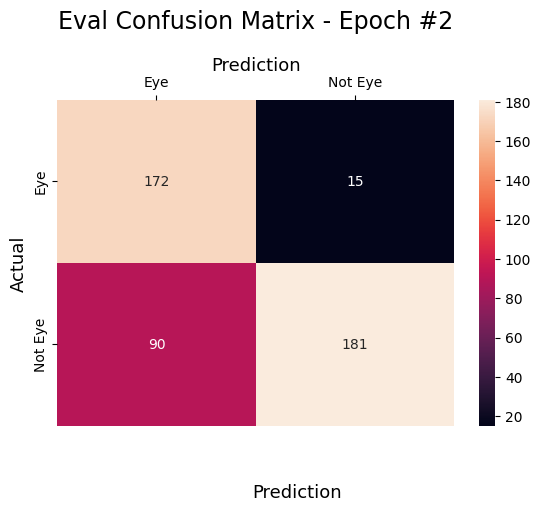

Epoch #3 
Training: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83      1449
           1       0.93      0.82      0.87      2215

    accuracy                           0.85      3664
   macro avg       0.85      0.86      0.85      3664
weighted avg       0.87      0.85      0.86      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       187
           1       0.94      0.87      0.91       271

    accuracy                           0.90       458
   macro avg       0.89      0.90      0.89       458
weighted avg       0.90      0.90      0.90       458



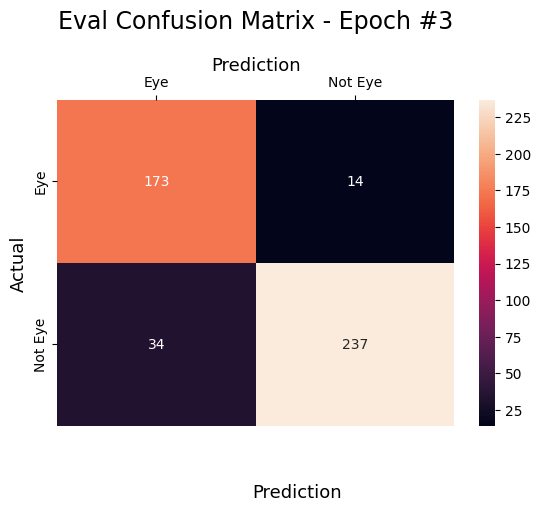

Epoch #4 
Training: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1449
           1       0.95      0.89      0.91      2215

    accuracy                           0.90      3664
   macro avg       0.89      0.90      0.90      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       187
           1       0.92      0.86      0.89       271

    accuracy                           0.87       458
   macro avg       0.87      0.88      0.87       458
weighted avg       0.88      0.87      0.87       458



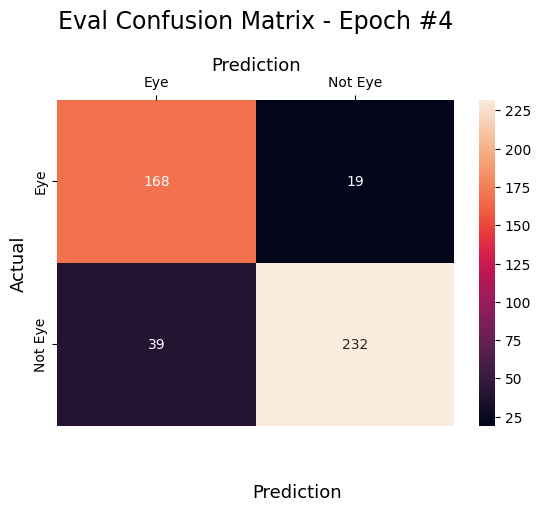

Epoch #5 
Training: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1449
           1       0.92      0.88      0.90      2215

    accuracy                           0.88      3664
   macro avg       0.87      0.88      0.88      3664
weighted avg       0.88      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       187
           1       0.92      0.96      0.94       271

    accuracy                           0.93       458
   macro avg       0.93      0.92      0.92       458
weighted avg       0.93      0.93      0.93       458



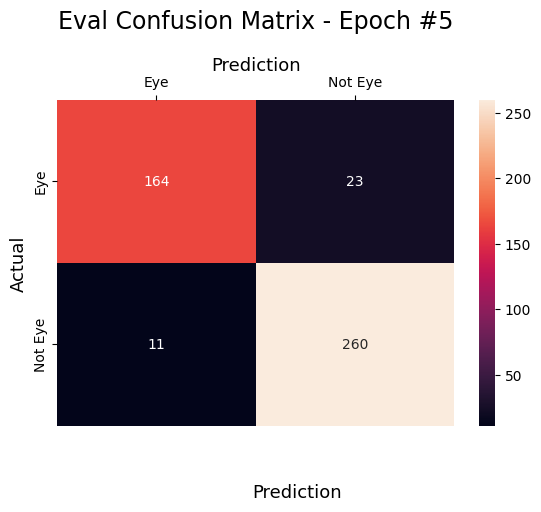

Epoch #6 
Training: 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      1449
           1       0.96      0.81      0.88      2215

    accuracy                           0.86      3664
   macro avg       0.86      0.88      0.86      3664
weighted avg       0.88      0.86      0.86      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       187
           1       0.97      0.89      0.93       271

    accuracy                           0.92       458
   macro avg       0.92      0.93      0.92       458
weighted avg       0.93      0.92      0.92       458



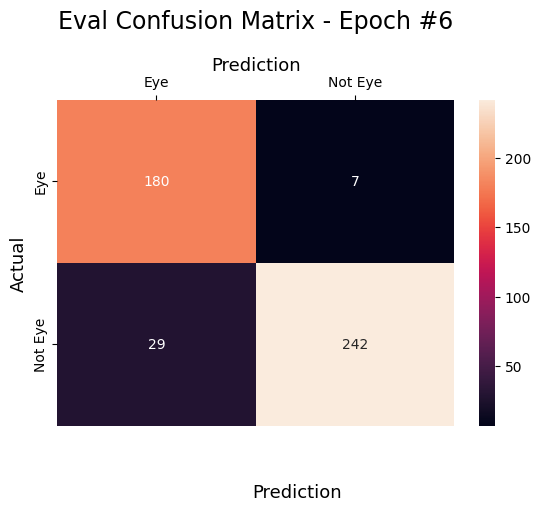

Epoch #7 
Training: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1449
           1       0.97      0.85      0.91      2215

    accuracy                           0.90      3664
   macro avg       0.89      0.91      0.89      3664
weighted avg       0.91      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       187
           1       0.99      0.83      0.91       271

    accuracy                           0.90       458
   macro avg       0.90      0.91      0.90       458
weighted avg       0.91      0.90      0.90       458



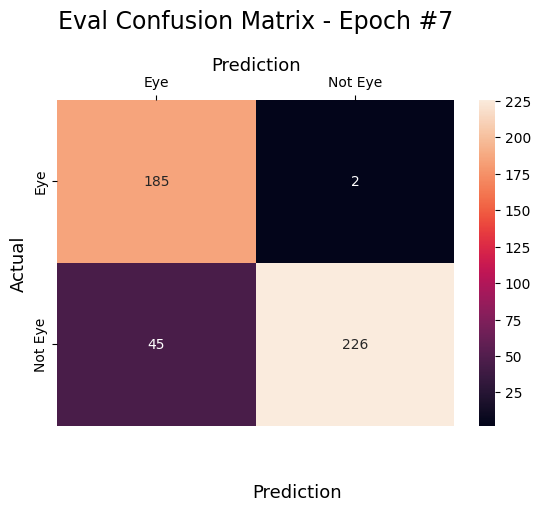

Epoch #8 
Training: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88      1449
           1       0.95      0.88      0.91      2215

    accuracy                           0.90      3664
   macro avg       0.89      0.90      0.89      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       187
           1       0.98      0.80      0.88       271

    accuracy                           0.88       458
   macro avg       0.88      0.89      0.87       458
weighted avg       0.90      0.88      0.88       458



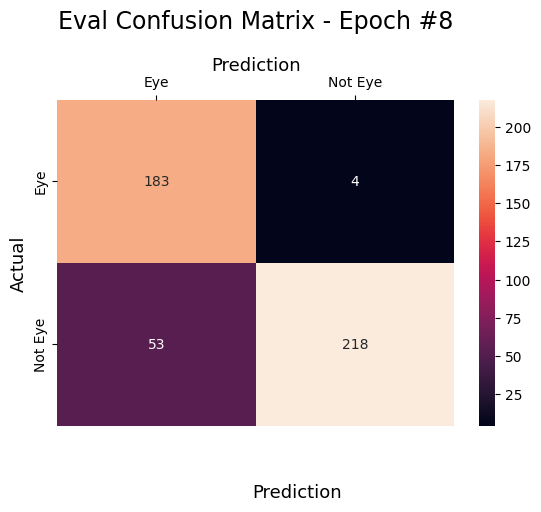

Epoch #9 
Training: 
               precision    recall  f1-score   support

           0       0.57      0.96      0.72      1449
           1       0.95      0.53      0.68      2215

    accuracy                           0.70      3664
   macro avg       0.76      0.74      0.70      3664
weighted avg       0.80      0.70      0.69      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.55      0.87      0.68       187
           1       0.85      0.52      0.64       271

    accuracy                           0.66       458
   macro avg       0.70      0.69      0.66       458
weighted avg       0.73      0.66      0.66       458



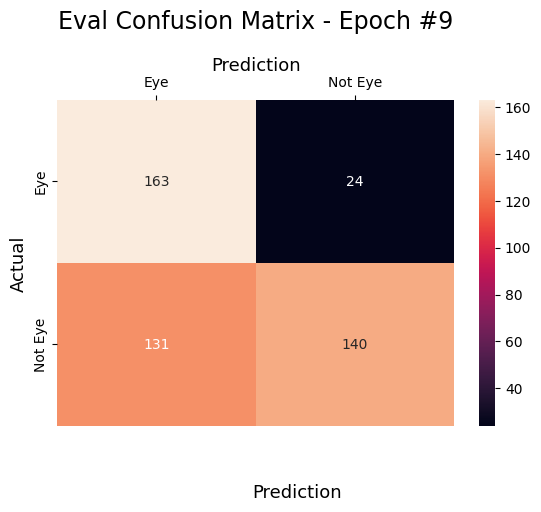

Epoch #10 
Training: 
               precision    recall  f1-score   support

           0       0.58      0.92      0.72      1449
           1       0.92      0.57      0.70      2215

    accuracy                           0.71      3664
   macro avg       0.75      0.75      0.71      3664
weighted avg       0.79      0.71      0.71      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       187
           1       0.97      0.79      0.87       271

    accuracy                           0.86       458
   macro avg       0.86      0.88      0.86       458
weighted avg       0.88      0.86      0.86       458



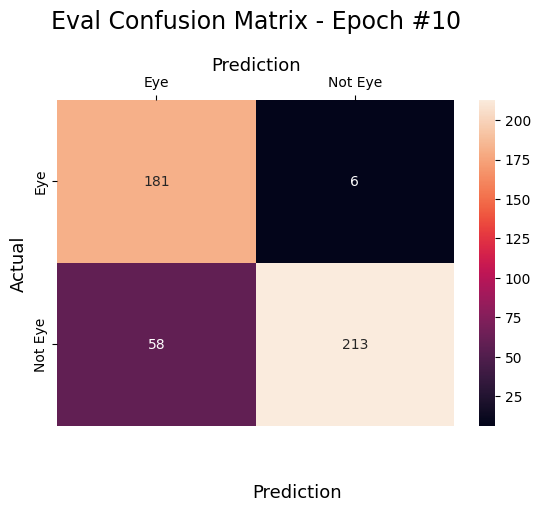

Epoch #11 
Training: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1449
           1       0.93      0.87      0.90      2215

    accuracy                           0.89      3664
   macro avg       0.88      0.89      0.88      3664
weighted avg       0.89      0.89      0.89      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       187
           1       0.92      0.93      0.92       271

    accuracy                           0.91       458
   macro avg       0.91      0.91      0.91       458
weighted avg       0.91      0.91      0.91       458



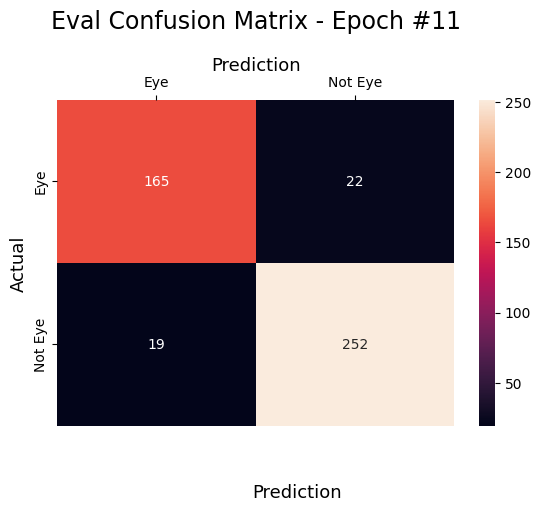

Epoch #12 
Training: 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      1449
           1       0.98      0.81      0.89      2215

    accuracy                           0.87      3664
   macro avg       0.87      0.89      0.87      3664
weighted avg       0.90      0.87      0.87      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       187
           1       0.98      0.88      0.92       271

    accuracy                           0.91       458
   macro avg       0.91      0.92      0.91       458
weighted avg       0.92      0.91      0.92       458



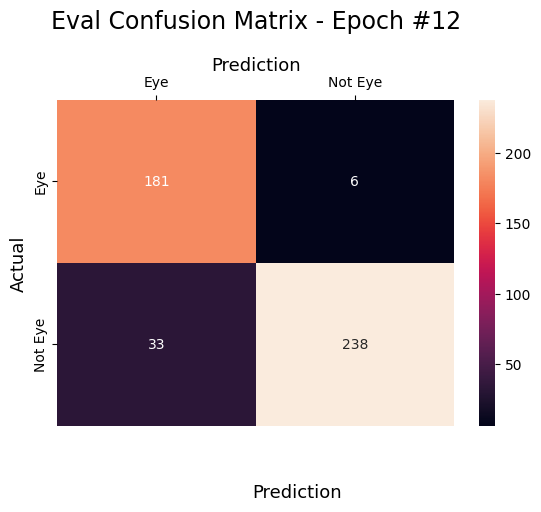

Epoch #13 
Training: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1449
           1       0.95      0.85      0.89      2215

    accuracy                           0.88      3664
   macro avg       0.87      0.89      0.88      3664
weighted avg       0.89      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       187
           1       0.92      0.92      0.92       271

    accuracy                           0.90       458
   macro avg       0.90      0.90      0.90       458
weighted avg       0.90      0.90      0.90       458



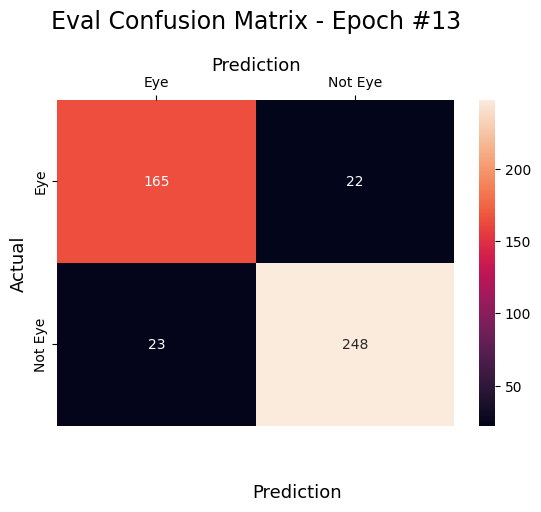

Epoch #14 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1449
           1       0.94      0.94      0.94      2215

    accuracy                           0.93      3664
   macro avg       0.92      0.92      0.92      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       187
           1       0.90      0.97      0.93       271

    accuracy                           0.92       458
   macro avg       0.92      0.91      0.91       458
weighted avg       0.92      0.92      0.92       458



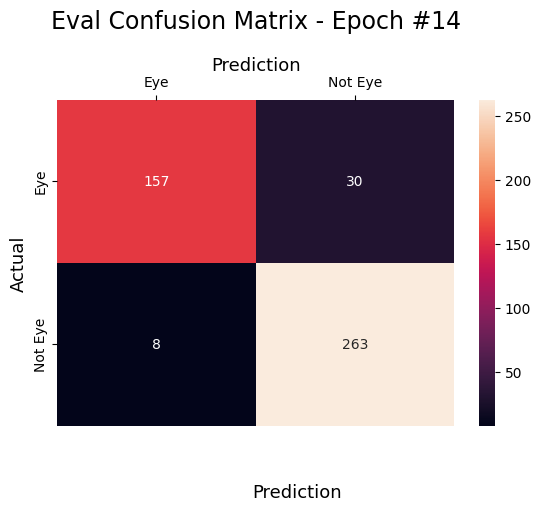

Epoch #15 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1449
           1       0.92      0.94      0.93      2215

    accuracy                           0.91      3664
   macro avg       0.91      0.91      0.91      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       187
           1       0.95      0.87      0.91       271

    accuracy                           0.90       458
   macro avg       0.89      0.90      0.90       458
weighted avg       0.90      0.90      0.90       458



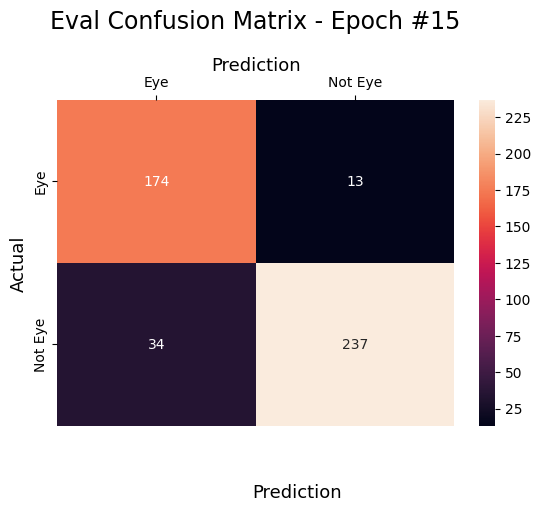

Epoch #16 
Training: 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86      1449
           1       0.96      0.83      0.89      2215

    accuracy                           0.88      3664
   macro avg       0.87      0.89      0.87      3664
weighted avg       0.89      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       187
           1       0.97      0.80      0.88       271

    accuracy                           0.87       458
   macro avg       0.87      0.88      0.87       458
weighted avg       0.89      0.87      0.87       458



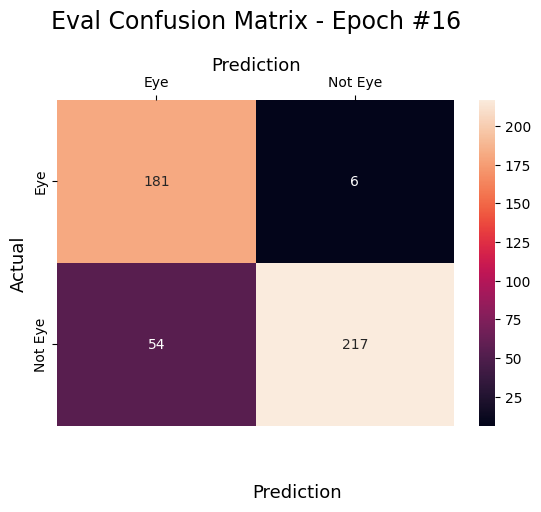

Epoch #17 
Training: 
               precision    recall  f1-score   support

           0       0.76      0.95      0.84      1449
           1       0.96      0.80      0.87      2215

    accuracy                           0.86      3664
   macro avg       0.86      0.87      0.86      3664
weighted avg       0.88      0.86      0.86      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       187
           1       0.90      0.94      0.92       271

    accuracy                           0.90       458
   macro avg       0.90      0.89      0.90       458
weighted avg       0.90      0.90      0.90       458



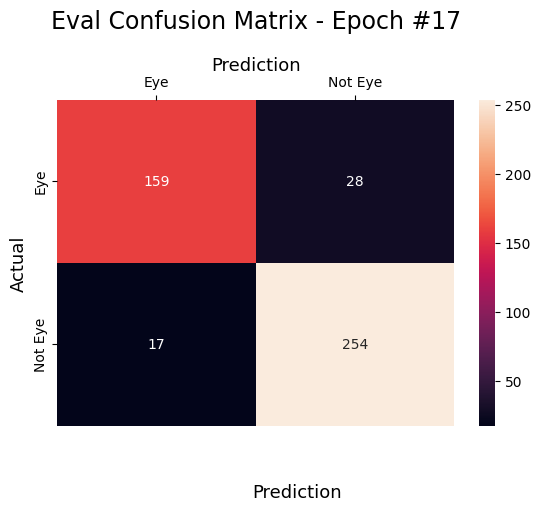

Epoch #18 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1449
           1       0.89      0.92      0.90      2215

    accuracy                           0.88      3664
   macro avg       0.88      0.87      0.87      3664
weighted avg       0.88      0.88      0.88      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       187
           1       0.90      0.92      0.91       271

    accuracy                           0.89       458
   macro avg       0.89      0.88      0.88       458
weighted avg       0.89      0.89      0.89       458



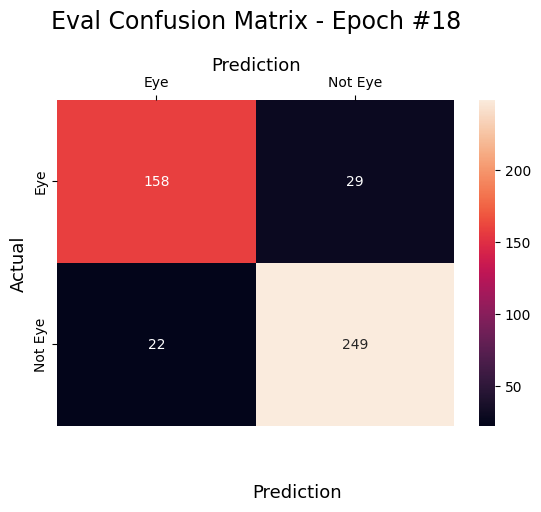

Epoch #19 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      1449
           1       0.87      0.92      0.89      2215

    accuracy                           0.87      3664
   macro avg       0.87      0.86      0.86      3664
weighted avg       0.87      0.87      0.87      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       187
           1       0.91      0.92      0.92       271

    accuracy                           0.90       458
   macro avg       0.90      0.89      0.90       458
weighted avg       0.90      0.90      0.90       458



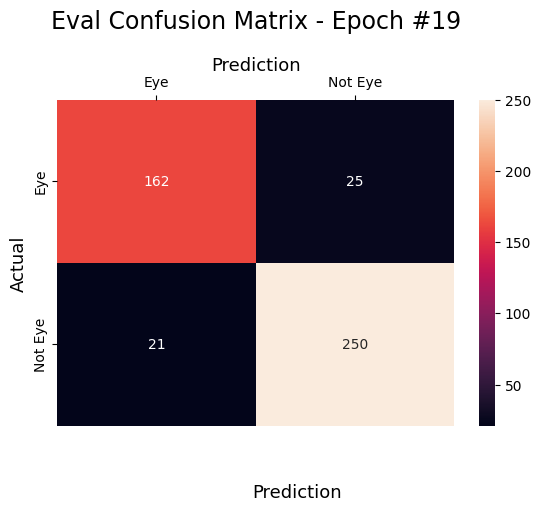

Epoch #20 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1449
           1       0.93      0.90      0.92      2215

    accuracy                           0.90      3664
   macro avg       0.89      0.90      0.90      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       187
           1       0.96      0.90      0.93       271

    accuracy                           0.92       458
   macro avg       0.92      0.93      0.92       458
weighted avg       0.93      0.92      0.92       458



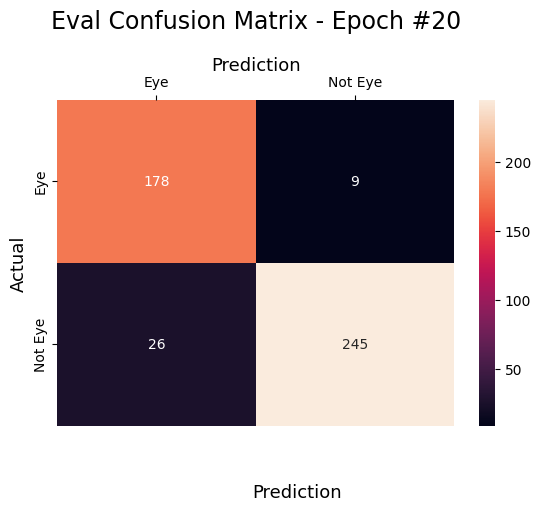

Epoch #21 
Training: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1449
           1       0.96      0.89      0.93      2215

    accuracy                           0.91      3664
   macro avg       0.91      0.92      0.91      3664
weighted avg       0.92      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       187
           1       0.95      0.90      0.92       271

    accuracy                           0.91       458
   macro avg       0.91      0.91      0.91       458
weighted avg       0.91      0.91      0.91       458



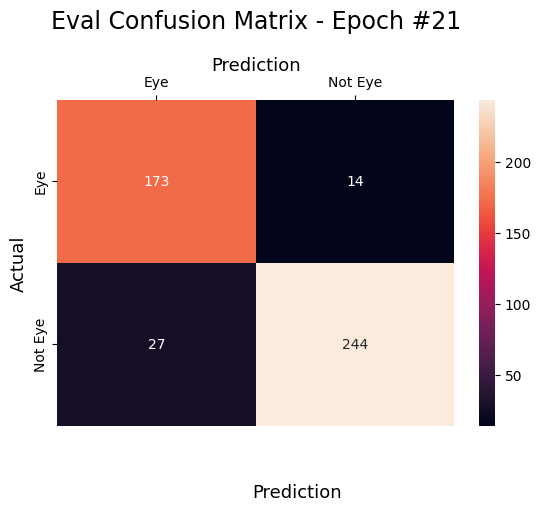

Epoch #22 
Training: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1449
           1       0.92      0.93      0.92      2215

    accuracy                           0.91      3664
   macro avg       0.90      0.90      0.90      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       187
           1       0.94      0.92      0.93       271

    accuracy                           0.92       458
   macro avg       0.91      0.92      0.91       458
weighted avg       0.92      0.92      0.92       458



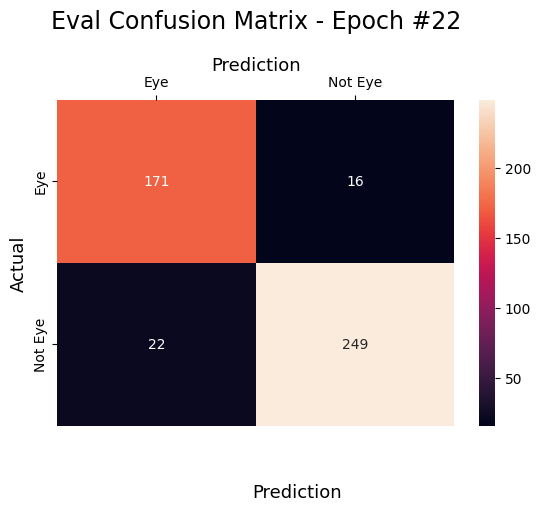

Epoch #23 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1449
           1       0.90      0.94      0.92      2215

    accuracy                           0.90      3664
   macro avg       0.90      0.89      0.89      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       187
           1       0.93      0.92      0.92       271

    accuracy                           0.91       458
   macro avg       0.91      0.91      0.91       458
weighted avg       0.91      0.91      0.91       458



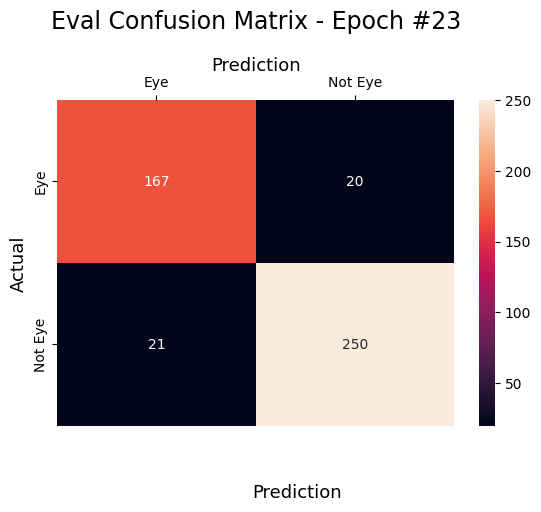

Epoch #24 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1449
           1       0.93      0.92      0.92      2215

    accuracy                           0.91      3664
   macro avg       0.90      0.90      0.90      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.96      0.79      0.86       187
           1       0.87      0.98      0.92       271

    accuracy                           0.90       458
   macro avg       0.91      0.88      0.89       458
weighted avg       0.91      0.90      0.90       458



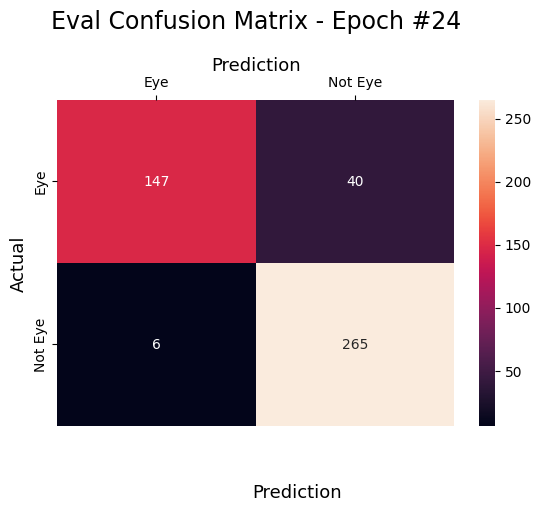

Epoch #25 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1449
           1       0.89      0.94      0.92      2215

    accuracy                           0.90      3664
   macro avg       0.90      0.88      0.89      3664
weighted avg       0.90      0.90      0.90      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       187
           1       0.95      0.93      0.94       271

    accuracy                           0.93       458
   macro avg       0.93      0.93      0.93       458
weighted avg       0.93      0.93      0.93       458



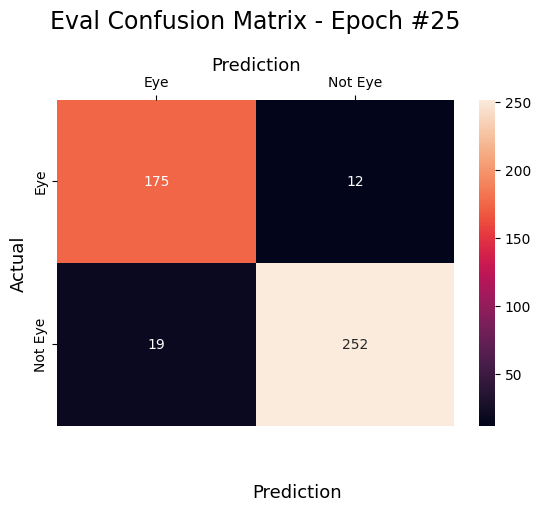

Epoch #26 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1449
           1       0.95      0.90      0.92      2215

    accuracy                           0.91      3664
   macro avg       0.90      0.91      0.91      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       187
           1       0.93      0.92      0.93       271

    accuracy                           0.91       458
   macro avg       0.91      0.91      0.91       458
weighted avg       0.92      0.91      0.91       458



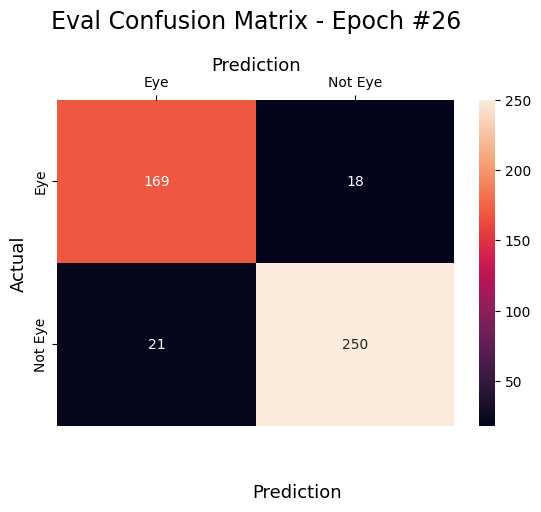

Epoch #27 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1449
           1       0.92      0.95      0.94      2215

    accuracy                           0.92      3664
   macro avg       0.92      0.91      0.92      3664
weighted avg       0.92      0.92      0.92      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       187
           1       0.90      0.96      0.93       271

    accuracy                           0.91       458
   macro avg       0.92      0.90      0.91       458
weighted avg       0.92      0.91      0.91       458



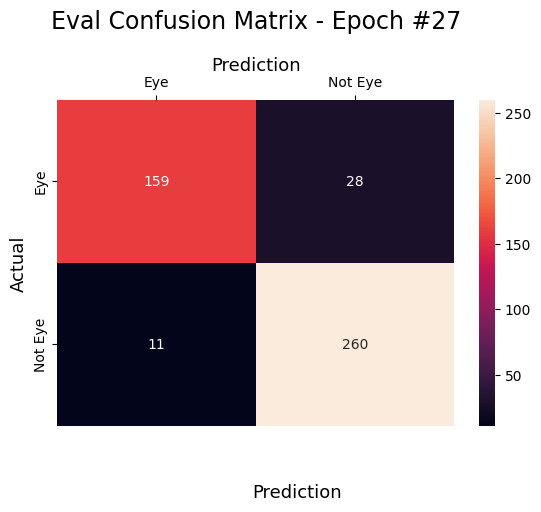

Epoch #28 
Training: 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      1449
           1       0.94      0.80      0.86      2215

    accuracy                           0.85      3664
   macro avg       0.84      0.86      0.84      3664
weighted avg       0.86      0.85      0.85      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.68      0.96      0.80       187
           1       0.96      0.69      0.81       271

    accuracy                           0.80       458
   macro avg       0.82      0.83      0.80       458
weighted avg       0.85      0.80      0.80       458



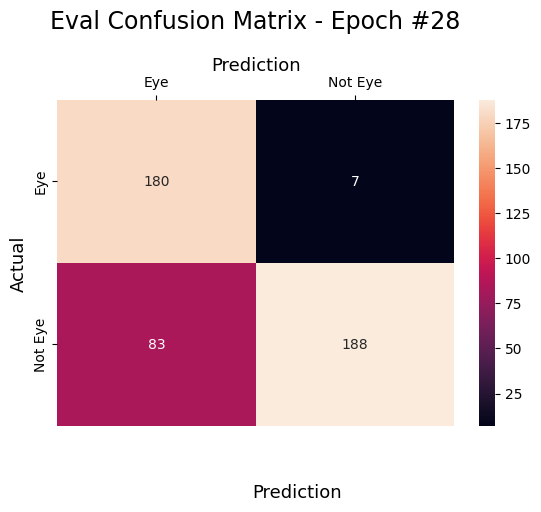

Epoch #29 
Training: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82      1449
           1       0.95      0.77      0.85      2215

    accuracy                           0.84      3664
   macro avg       0.84      0.86      0.84      3664
weighted avg       0.87      0.84      0.84      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       187
           1       0.95      0.92      0.94       271

    accuracy                           0.93       458
   macro avg       0.92      0.93      0.92       458
weighted avg       0.93      0.93      0.93       458



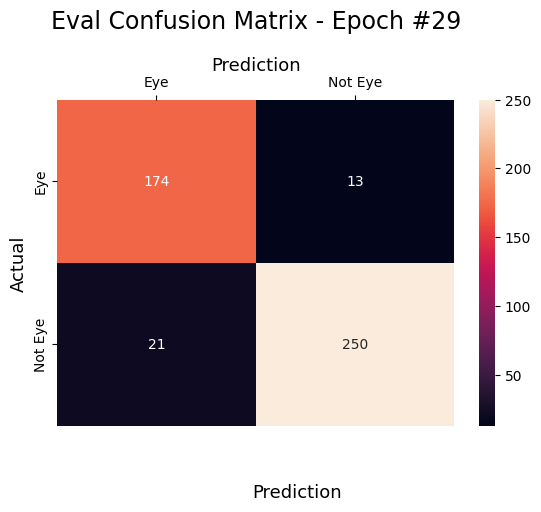

Epoch #30 
Training: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1449
           1       0.90      0.91      0.91      2215

    accuracy                           0.89      3664
   macro avg       0.88      0.88      0.88      3664
weighted avg       0.89      0.89      0.89      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.67      0.93      0.78       187
           1       0.93      0.68      0.79       271

    accuracy                           0.78       458
   macro avg       0.80      0.80      0.78       458
weighted avg       0.82      0.78      0.78       458



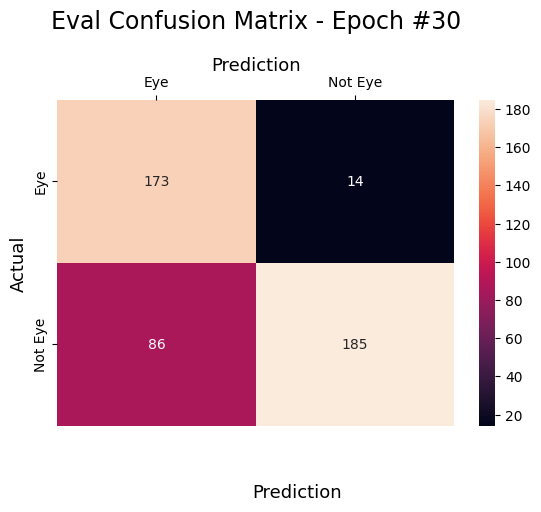

Epoch #31 
Training: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1449
           1       0.92      0.86      0.89      2215

    accuracy                           0.87      3664
   macro avg       0.86      0.88      0.87      3664
weighted avg       0.88      0.87      0.87      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       187
           1       0.94      0.93      0.94       271

    accuracy                           0.93       458
   macro avg       0.92      0.92      0.92       458
weighted avg       0.93      0.93      0.93       458



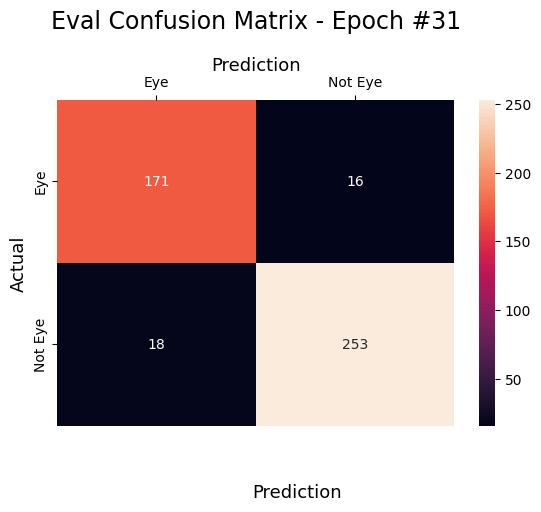

Epoch #32 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1449
           1       0.92      0.92      0.92      2215

    accuracy                           0.91      3664
   macro avg       0.90      0.90      0.90      3664
weighted avg       0.91      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       187
           1       0.95      0.87      0.91       271

    accuracy                           0.90       458
   macro avg       0.89      0.90      0.90       458
weighted avg       0.90      0.90      0.90       458



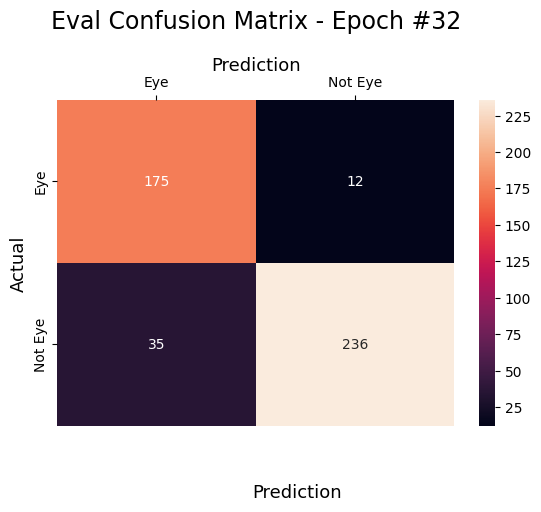

Epoch #33 
Training: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      1449
           1       0.94      0.91      0.93      2215

    accuracy                           0.91      3664
   macro avg       0.91      0.91      0.91      3664
weighted avg       0.92      0.91      0.91      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       187
           1       0.92      0.96      0.94       271

    accuracy                           0.93       458
   macro avg       0.93      0.92      0.92       458
weighted avg       0.93      0.93      0.93       458



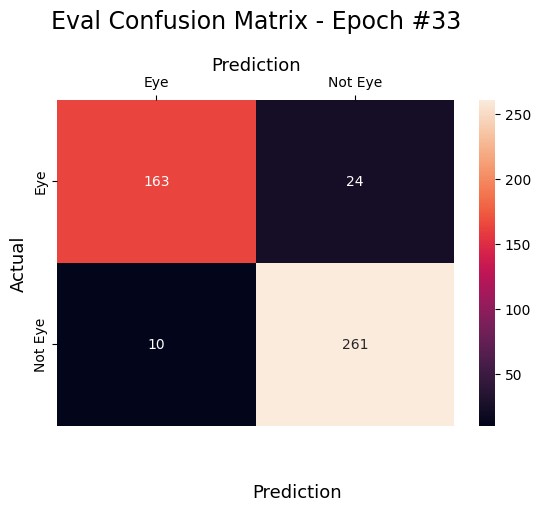

Epoch #34 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1449
           1       0.87      0.96      0.92      2215

    accuracy                           0.89      3664
   macro avg       0.90      0.87      0.88      3664
weighted avg       0.90      0.89      0.89      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       187
           1       0.93      0.94      0.94       271

    accuracy                           0.92       458
   macro avg       0.92      0.92      0.92       458
weighted avg       0.92      0.92      0.92       458



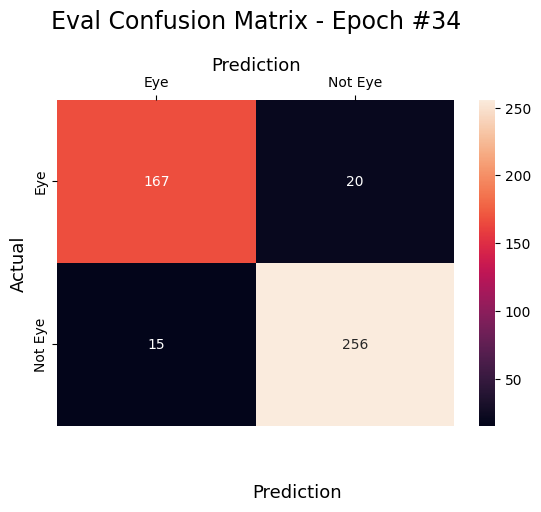

Epoch #35 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1449
           1       0.96      0.91      0.94      2215

    accuracy                           0.92      3664
   macro avg       0.92      0.93      0.92      3664
weighted avg       0.93      0.92      0.92      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       187
           1       0.96      0.92      0.94       271

    accuracy                           0.93       458
   macro avg       0.92      0.93      0.93       458
weighted avg       0.93      0.93      0.93       458



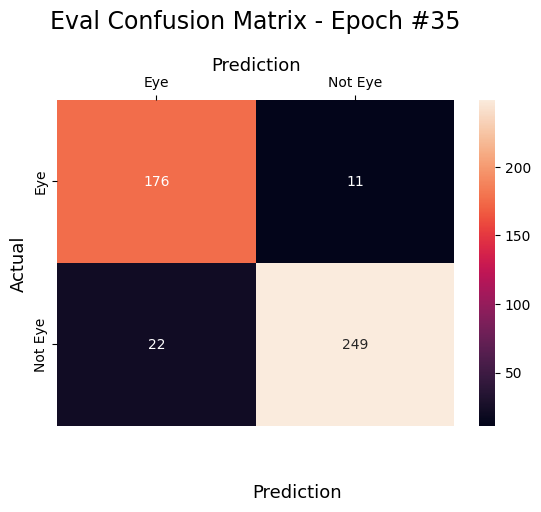

Epoch #36 
Training: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1449
           1       0.95      0.93      0.94      2215

    accuracy                           0.93      3664
   macro avg       0.92      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       187
           1       0.96      0.94      0.95       271

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.94      0.94      0.94       458



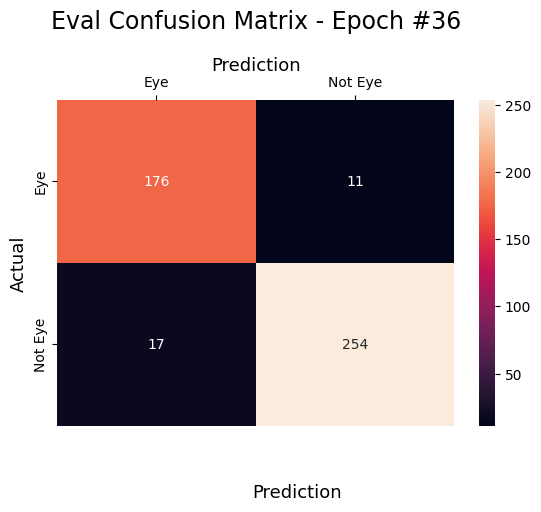

Epoch #37 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1449
           1       0.96      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       187
           1       0.97      0.91      0.94       271

    accuracy                           0.93       458
   macro avg       0.93      0.93      0.93       458
weighted avg       0.93      0.93      0.93       458



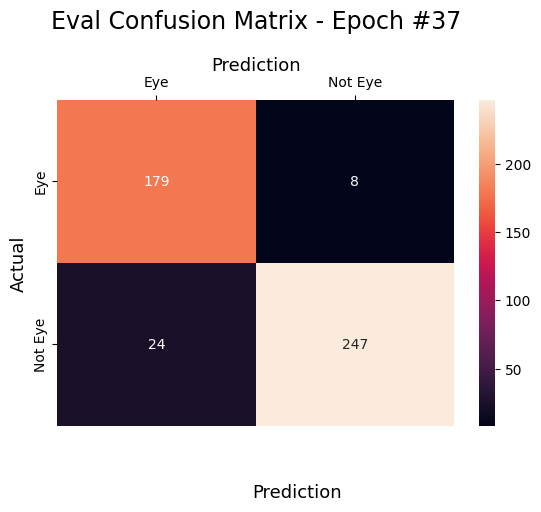

Epoch #38 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1449
           1       0.96      0.94      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.94      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       187
           1       0.95      0.94      0.95       271

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.94      0.94      0.94       458



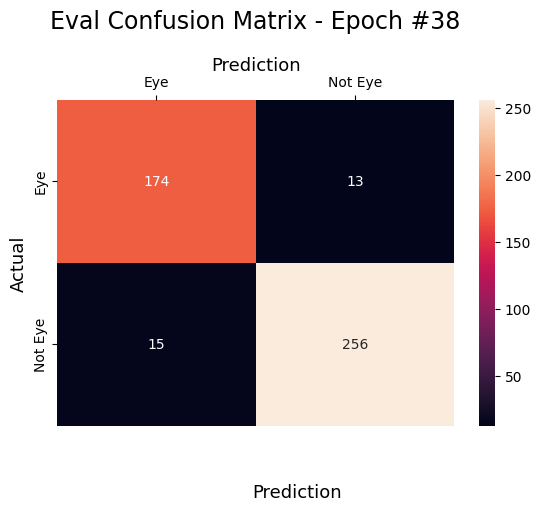

Epoch #39 
Training: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1449
           1       0.95      0.92      0.94      2215

    accuracy                           0.92      3664
   macro avg       0.92      0.93      0.92      3664
weighted avg       0.93      0.92      0.92      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       187
           1       0.91      0.96      0.93       271

    accuracy                           0.92       458
   macro avg       0.92      0.91      0.92       458
weighted avg       0.92      0.92      0.92       458



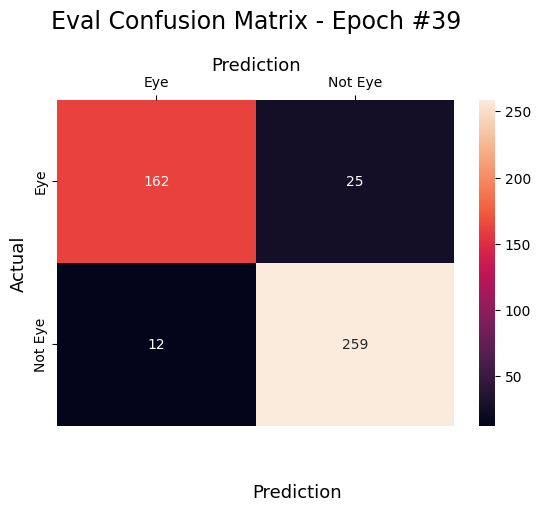

Epoch #40 
Training: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1449
           1       0.94      0.95      0.95      2215

    accuracy                           0.93      3664
   macro avg       0.93      0.93      0.93      3664
weighted avg       0.93      0.93      0.93      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       187
           1       0.93      0.95      0.94       271

    accuracy                           0.93       458
   macro avg       0.93      0.93      0.93       458
weighted avg       0.93      0.93      0.93       458



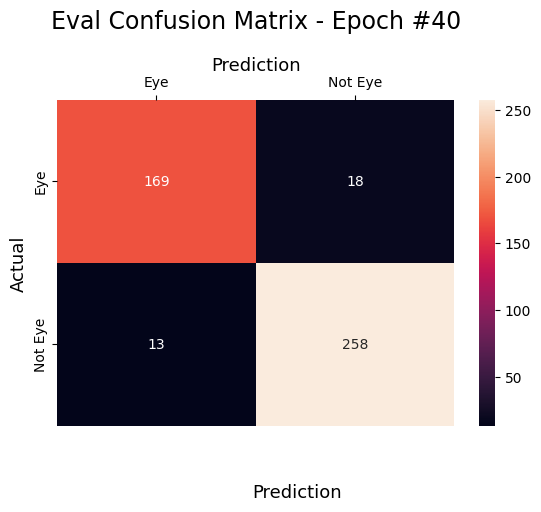

Epoch #41 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1449
           1       0.96      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.93      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       187
           1       0.96      0.94      0.95       271

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.94      0.94      0.94       458



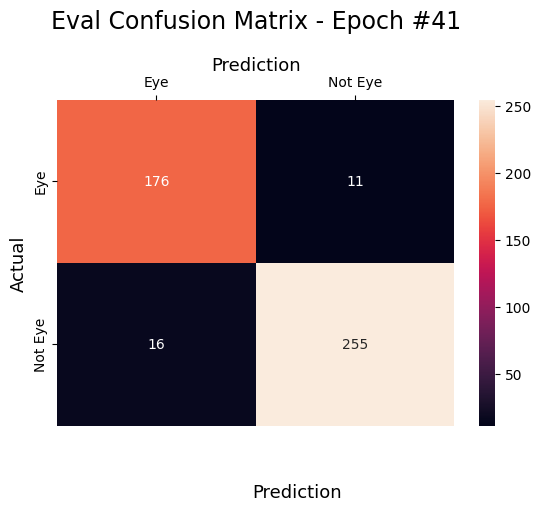

Epoch #42 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1449
           1       0.97      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       187
           1       0.97      0.94      0.96       271

    accuracy                           0.95       458
   macro avg       0.94      0.95      0.95       458
weighted avg       0.95      0.95      0.95       458



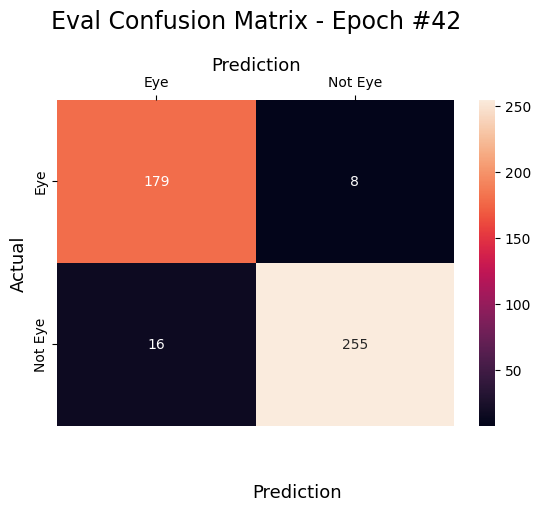

Epoch #43 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1449
           1       0.97      0.94      0.95      2215

    accuracy                           0.95      3664
   macro avg       0.94      0.95      0.94      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       187
           1       0.96      0.95      0.95       271

    accuracy                           0.95       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.95      0.95      0.95       458



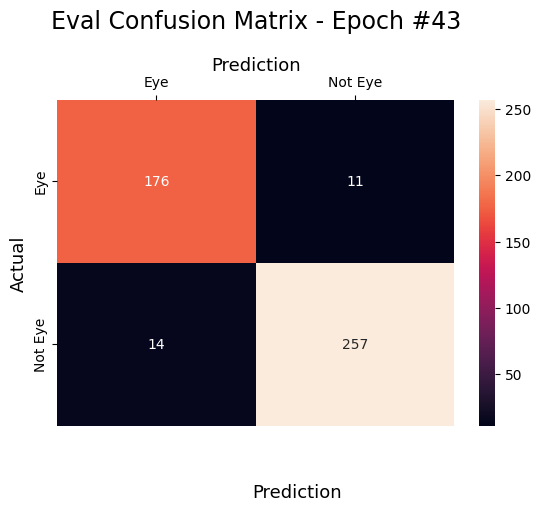

Epoch #44 
Training: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1449
           1       0.96      0.95      0.96      2215

    accuracy                           0.95      3664
   macro avg       0.94      0.95      0.95      3664
weighted avg       0.95      0.95      0.95      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       187
           1       0.96      0.96      0.96       271

    accuracy                           0.95       458
   macro avg       0.95      0.95      0.95       458
weighted avg       0.95      0.95      0.95       458



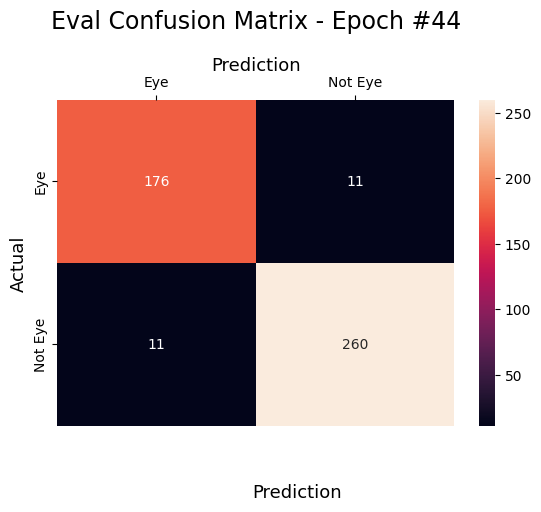

Epoch #45 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93      1449
           1       0.97      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       187
           1       0.97      0.94      0.95       271

    accuracy                           0.95       458
   macro avg       0.94      0.95      0.94       458
weighted avg       0.95      0.95      0.95       458



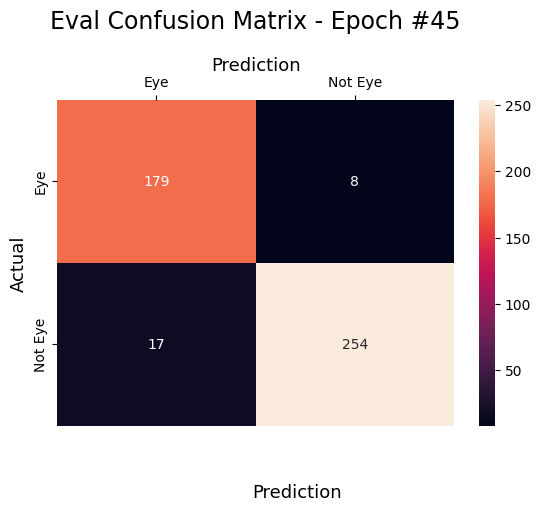

Epoch #46 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1449
           1       0.96      0.94      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.94      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       187
           1       0.96      0.94      0.95       271

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.94      0.94      0.94       458



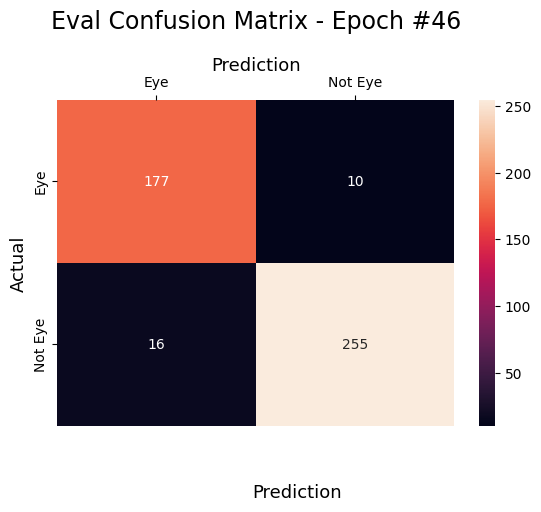

Epoch #47 
Training: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1449
           1       0.97      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.93      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       187
           1       0.96      0.94      0.95       271

    accuracy                           0.95       458
   macro avg       0.94      0.95      0.94       458
weighted avg       0.95      0.95      0.95       458



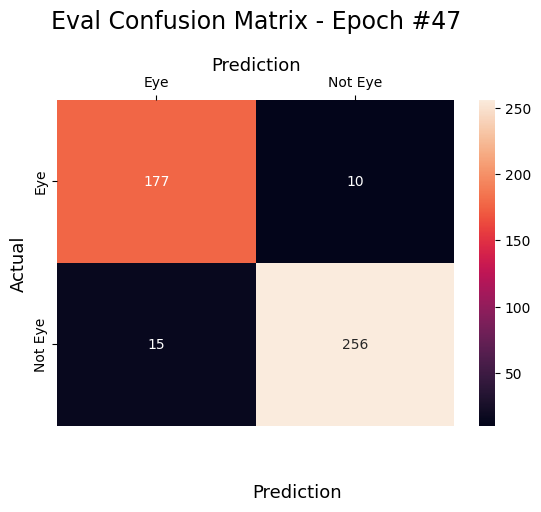

Epoch #48 
Training: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1449
           1       0.97      0.94      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.94      0.95      0.94      3664
weighted avg       0.95      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       187
           1       0.97      0.93      0.95       271

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.94      0.94      0.94       458



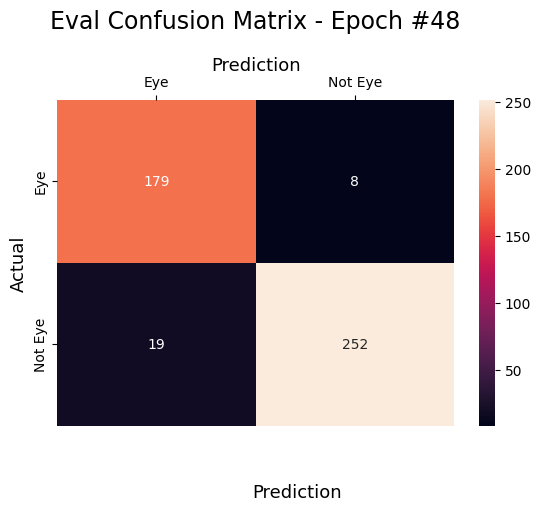

Epoch #49 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1449
           1       0.97      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.94      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       187
           1       0.96      0.94      0.95       271

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.94      0.94      0.94       458



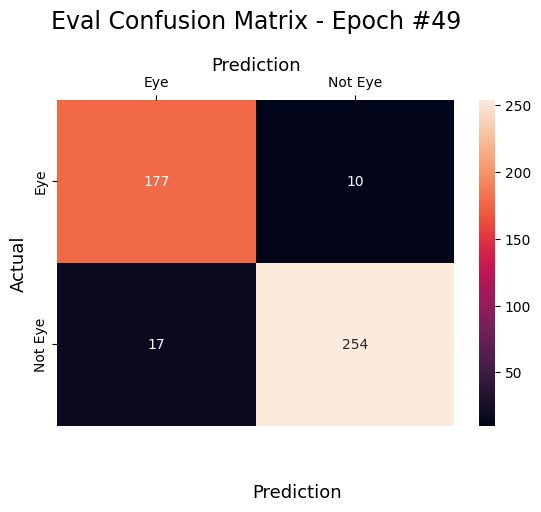

Epoch #50 
Training: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1449
           1       0.97      0.93      0.95      2215

    accuracy                           0.94      3664
   macro avg       0.94      0.94      0.94      3664
weighted avg       0.94      0.94      0.94      3664

Evaluation: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       187
           1       0.96      0.96      0.96       271

    accuracy                           0.95       458
   macro avg       0.95      0.95      0.95       458
weighted avg       0.95      0.95      0.95       458



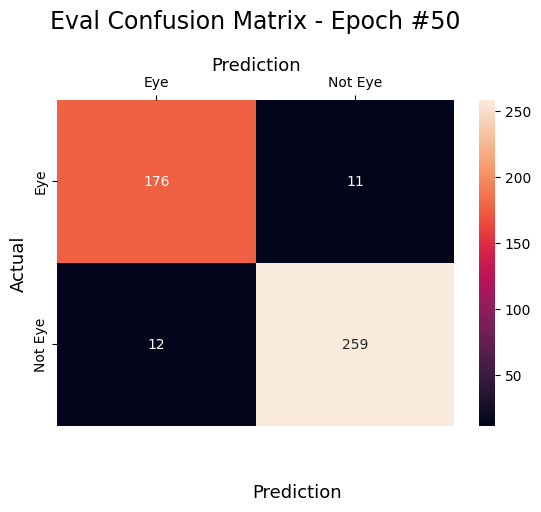

In [12]:
num_epochs = 50

for i in range(num_epochs):
    
    print(f"Epoch #{i+1} ")
    
    train_actual, train_predicted = model_train(model, optimizer, criterion, train_loader)
    eval_actual, eval_predicted = model_eval(model, criterion, val_loader)
    
    print("Training: \n", classification_report(train_actual, train_predicted))
    print("Evaluation: \n", classification_report(eval_actual, eval_predicted))
    create_confusion_matrix(eval_actual, eval_predicted, i)
    

In [18]:
torch.save(model, "models_info/model_1.pth")